Reference: https://mori-memo.hateblo.jp/entry/2022/04/20/234122

In [104]:
import numpy as np

N = 1024              # サンプル数
dt = 1                # サンプリング周期 [s]
f1, f2 = 0.01, 0.1    # 周波数 [Hz]

x = np.arange(0, N * dt, dt) # 時間 [s]
y = 3 * np.sin(2 * np.pi * f1 * x) + 0.5 * np.sin(2 * np.pi * f2 * x)

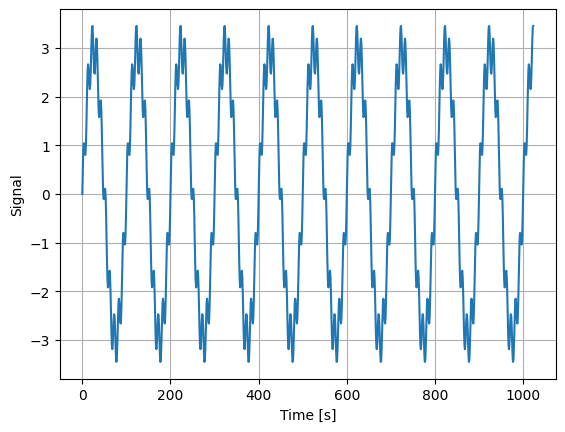

In [105]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal")
ax.grid()
plt.show()

In [106]:
F = np.fft.fft(y)              # フーリエ変換
freq = np.fft.fftfreq(N, d=dt) # 周波数スケール

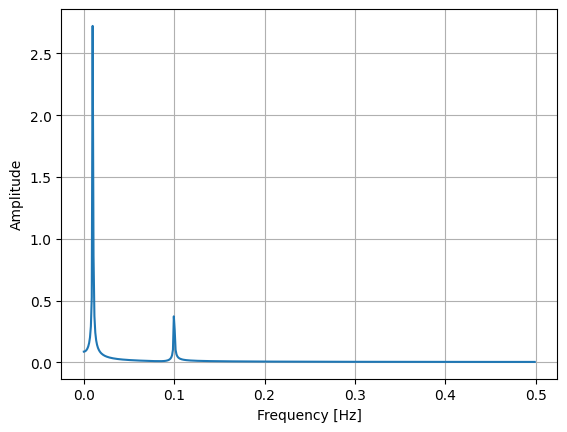

In [107]:
# フーリエ変換の結果を正規化
F_adj = F / (N / 2)

# 振幅スペクトル
Amp = np.abs(F_adj)
fig, ax = plt.subplots()
ax.plot(freq[:N // 2], Amp[:N // 2])
#ax.set_xlim(0, 0.2)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

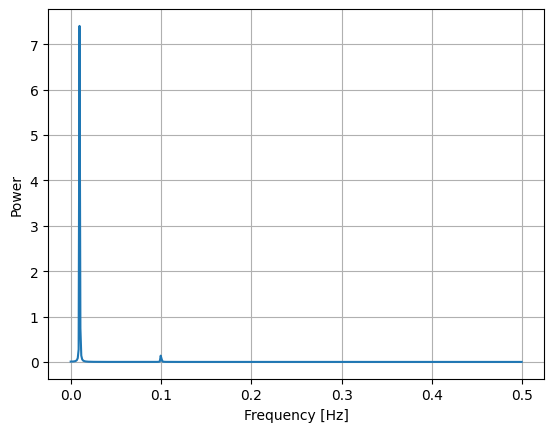

In [108]:
# パワースペクトルの計算（振幅スペクトルの二乗）
Pow = Amp ** 2
fig, ax = plt.subplots()
ax.plot(freq[:N//2],Pow[:N//2])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Power")
ax.grid()
plt.show()